In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
city = pd.read_csv('city_data.csv')
ride = pd.read_csv('ride_data.csv')

In [3]:
city.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
merged = pd.merge(city, ride, how="inner", on="city")

In [6]:
merged.head(4)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413


In [7]:
by_city = merged.groupby('city')['fare'].agg('mean').to_frame('Average Fare').reset_index()

In [8]:
by_city.head(4)

,city,Average Fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111


In [9]:
num_drivers = merged.groupby('city')['driver_count'].count().to_frame('Number of Drivers').reset_index()

In [10]:
num_rides = merged.groupby('city')['ride_id'].count().to_frame('Number of Rides').reset_index()

In [11]:
by_city = pd.merge(by_city, num_drivers, how='inner', on='city')

In [12]:
by_city = pd.merge(by_city, num_rides, how='inner', on='city')

In [13]:
by_city.head(4)

,city,Average Fare,Number of Drivers,Number of Rides
0,Amandaburgh,24.641667,18,18
1,Barajasview,25.332273,22,22
2,Barronchester,36.422500,16,16
3,Bethanyland,32.956111,18,18


(0.0, 40.83137649315978)

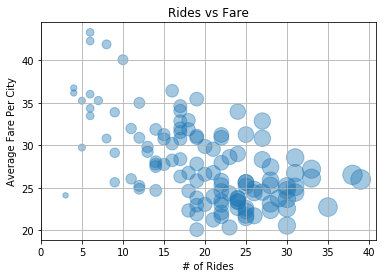

In [14]:
plt.grid()
plt.scatter(by_city['Number of Drivers'], by_city['Average Fare'], alpha=0.4, s=10*by_city['Number of Drivers'])
plt.ylabel('Average Fare Per City')
plt.xlabel('# of Rides')
plt.title('Rides vs Fare')
plt.xlim(xmin=0.0)

In [15]:
merged['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [20]:
by_fare = merged.groupby('type')
by_fare.sum()

,driver_count,fare,ride_id
type,,,
Rural,537,4327.93,580968240341287
Suburban,8570,19356.33,3106884522576766
Urban,59602,39854.38,7919412664056093


Text(0.5,1,'% of Total Fares')

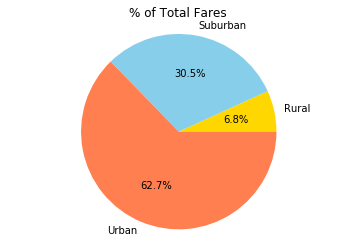

In [28]:
colors = ['gold', 'skyblue', 'coral']
plt.pie(by_fare.sum()['fare'], colors=colors, labels = ['Rural','Suburban','Urban'], autopct='%.1f%%');
plt.axis('equal');
plt.title("% of Total Fares")

Text(0.5,1,'% of Total Rides')

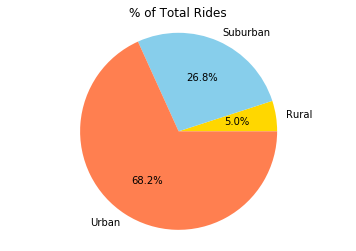

In [29]:
colors = ['gold', 'skyblue', 'coral']
plt.pie(by_fare.sum()['ride_id'], colors=colors, labels = ['Rural','Suburban','Urban'], autopct='%.1f%%');
plt.axis('equal');
plt.title("% of Total Rides")